# imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor #회귀
from sklearn.metrics import mean_squared_error,r2_score 

## wine 데이터셋

In [ ]:
wine_csv ='http://bit.ly/wine_csv_data'

In [ ]:
wine= pd.read_csv(wine_csv)

In [ ]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine['class'].value_counts()
#> 0: red wine, 1: white wine
# class는 변수이름을 사용할 수 없는데, 파이썬의 클래스 class가 이미 있기 때문에

1.0    4898
0.0    1599
Name: class, dtype: int64

In [ ]:
X= wine.iloc[:,:3].values.copy() #numpy배열로 만들기
y= wine['class'].values.astype('int').copy()

In [ ]:
X[:5]

array([[9.4 , 1.9 , 3.51],
       [9.8 , 2.6 , 3.2 ],
       [9.8 , 2.3 , 3.26],
       [9.8 , 1.9 , 3.16],
       [9.4 , 1.9 , 3.51]])

In [ ]:
y[:5]

array([0, 0, 0, 0, 0])

In [ ]:
X_tr, X_te, y_tr,y_te= train_test_split(X,y,
                                        test_size=0.2,
                                        stratify=y,
                                        random_state=42)

In [ ]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((5197, 3), (1300, 3), (5197,), (1300,))

In [ ]:
# Decision Tree(결정 트리)
feature_names = wine.columns[:3]
feature_names

Index(['alcohol', 'sugar', 'pH'], dtype='object')

In [ ]:
target_names = ['red','white']
target_names

['red', 'white']

# Decision Tree Classification

In [ ]:
# 모델 생성
tree_clf = DecisionTreeClassifier(random_state=42)
# random_state는 하이퍼 파라미터 튜닝이 아니다.

In [ ]:
# 모델 훈련
tree_clf.fit(X_tr,y_tr)

DecisionTreeClassifier(random_state=42)

In [ ]:
# 훈련 셋 예측값
tr_pred = tree_clf.predict(X_tr)

In [ ]:
confusion_matrix(y_tr,tr_pred)

array([[1276,    3],
       [   8, 3910]])

In [ ]:
print(classification_report(y_tr,tr_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1279
           1       1.00      1.00      1.00      3918

    accuracy                           1.00      5197
   macro avg       1.00      1.00      1.00      5197
weighted avg       1.00      1.00      1.00      5197



In [ ]:
# 테스트 셋 예측값
te_pred = tree_clf.predict(X_te)

In [ ]:
confusion_matrix(y_te,te_pred)

array([[226,  94],
       [ 81, 899]])

In [ ]:
print(classification_report(y_te,te_pred))
# train acc: 1.0, test acc: 0.87 -> overfitting.

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       320
           1       0.91      0.92      0.91       980

    accuracy                           0.87      1300
   macro avg       0.82      0.81      0.82      1300
weighted avg       0.86      0.87      0.86      1300



In [ ]:
tree_clf.score(X_tr,y_tr)

0.9978833942659227

In [ ]:
tree_clf.score(X_te,y_te) # 과대적합

0.8653846153846154

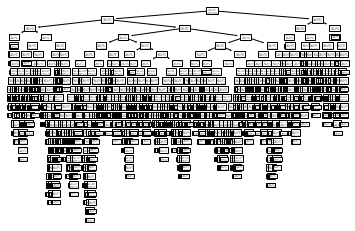

In [ ]:
# decision tree 알고리즘을 훈련 데이터로 학습시키면 tree가 만들어짐
plot_tree(tree_clf)
plt.show()

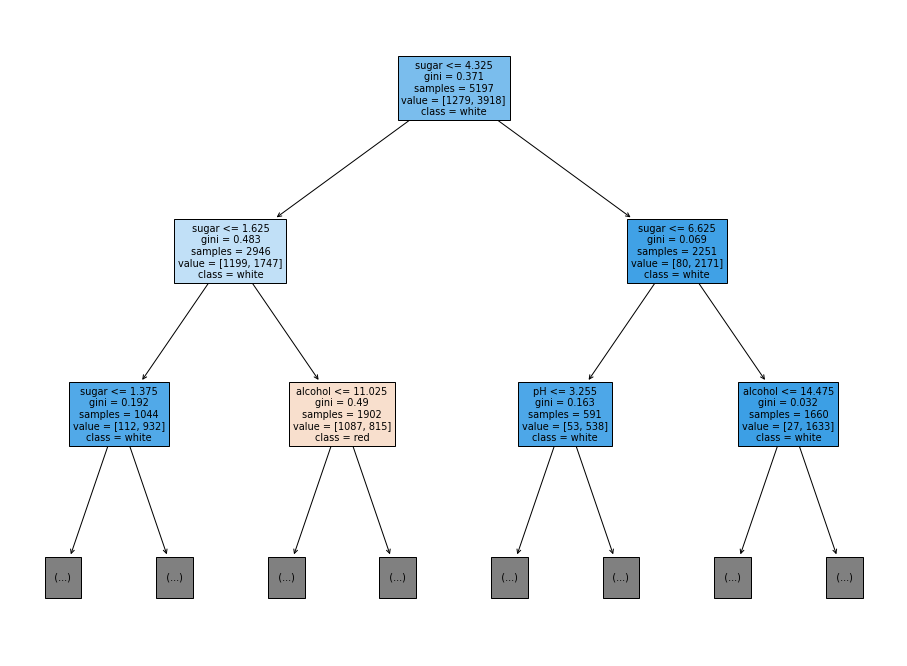

In [ ]:
# decision tree가 너무 복잡하기 때문에, 처음 2개 depth까지만 시각화
plt.figure(figsize=(16,12))
plot_tree(tree_clf, max_depth=2, feature_names=feature_names, class_names=target_names,
          filled=True)
plt.show()

# Decision Tree를 나누는 기준

**Gini impurity(불순도)**

$
Gini = 1 - \sum_i p_i^2
$

* $p_i$: i번째 클래스가 될 확률
* 이진분류(binary class)
    * gini = 1 - [(양성 클래스 확률)^2 + (음성 클래스 확률)^2]
    * 양성과 음성의 비율이 1:1인 경우, gini = 1-(0.5^2 + 0.5^2) = 0.5. 불순도 최대
    * 양성 또는 음성으로 완벽히 분류된 경우, gini = 1 - 1 = 0. 불순도 최소
* Decision tree는 부모 노드와 자식 노드의 Gini 불순도 차이가 가능한 커지도록 tree를 성장시킴.

**Entropy(엔트로피)**

$
Entropy = - \sum_i p_i \log_k(p_i)
$

* k: 클래스의 개수(이진 분류인 경우, k = 2)
* $ p_i $: i번째 클래스가 될 확률.
* 이진 분류
    * 양성과 음성의 비율이 1:1인 경우, $ Entropy = -( \frac{1}{2} \log_2(\frac{1}{2}) + \frac{1}{2} \log_2(\frac{1}{2}) ) = 1 $. 불순도 최대인 경우.
    * $ \log_22^n = n $.
    * 양성 또는 음성 한쪽으로 완벽히 분류된 경우, Entropy = 0. 불순도 최소인 경우.
* entropy를 decision tree의 criterion으로 사용하는 경우에는, 부모 노드와 자식 노드에서 entropy의 차이가 가능한 한 커지도록 tree를 생성.

# Decision Tree 특징

*   장점:
    *   특성들을 스케일링할 필요가 없다.
    *   결과를 이해하기 쉽다.
*   단점:
    *   과적합(overfitting)되기가 쉽다.
    *   여러가지 규제들을 적용해서 과적합 문제를 해결해야 함.
*   규제 하이퍼 파라미터(hyperparameter) - 생성자의 파라미터들
    *   `max_depth`: decision tree의 최대 깊이.
    *   `max_leaf_node`: leaf node의 최댓값.
    *   `max_features`: 각 노드에서 분할에 사용할 특성의 최대 개수.
    *   `min_samples_split`: 노드가 분할되기 위해서 가져야 할 최소 샘플 개수.
    *   `min_samples_leaf`: leaf 노드가 가져야 할 최소 샘플 개수.
    *   `max_`로 시작하는 파라미터의 값을 증가시키면, 트리의 크기가 커짐.
        *   규제가 작아짐.
        *   overfitting이 커짐.
    *   `max_`로 시작하는 파라미터 값을 감소시키면, 트리의 크기가 작아지기 때문에 overfitting이 작아짐.
    *   `min_`으로 시작하는 파라미터 값을 증가시키면, 트리의 크기가 작아짐.

# Hyperparameter 튜닝

## `min_samples_split`

In [ ]:
# 모델 생성
# min_samples_split=0.2: 전체 훈련 샘플의 20% 이상인 경우 node를 나눔.
tree_clf2 = DecisionTreeClassifier(min_samples_split=0.2, # 전체 샘플의 20% 이상
                                   random_state=42)

# 모델 훈련
tree_clf2.fit(X_tr,y_tr)

# 모델 평가
print('train acc:', tree_clf2.score(X_tr,y_tr))
print('test acc:', tree_clf2.score(X_te,y_te))

train acc: 0.8458726188185491
test acc: 0.8407692307692308


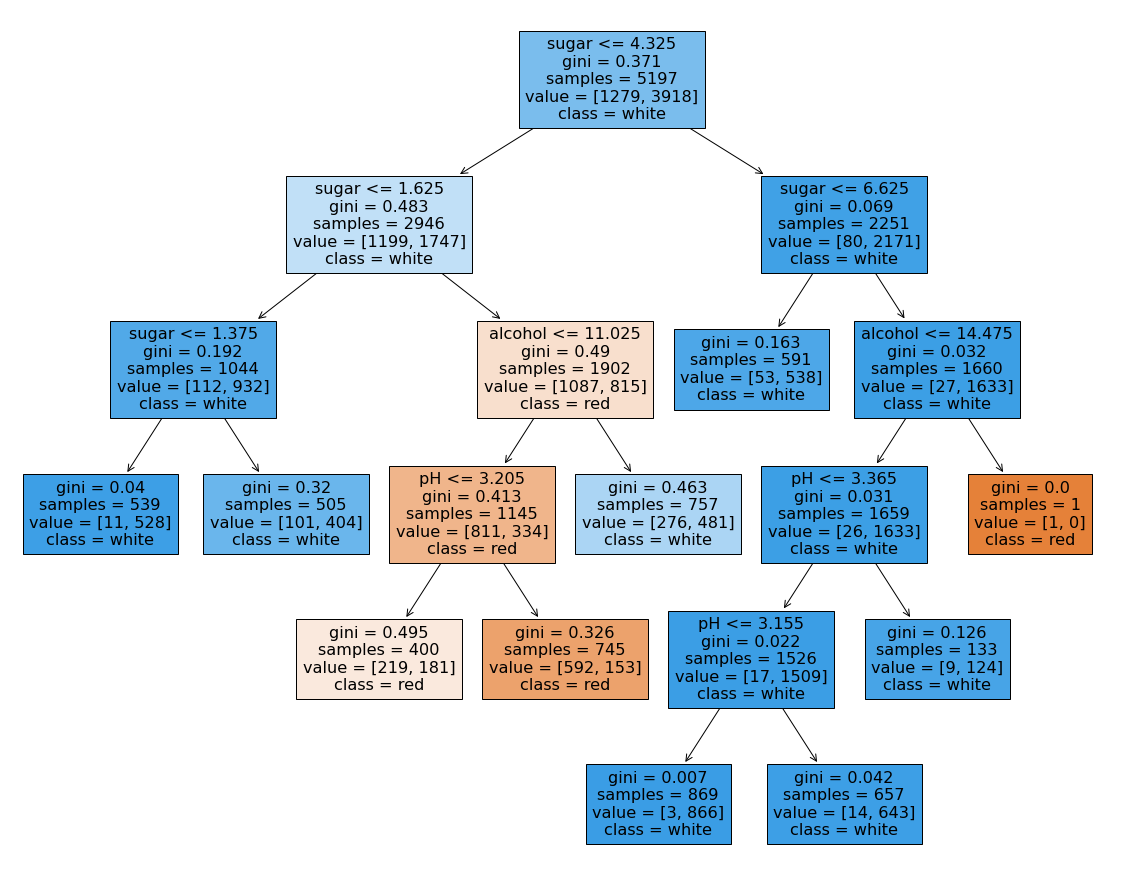

In [ ]:
plt.figure(figsize=(20, 16))
plot_tree(tree_clf2, feature_names=feature_names, class_names=target_names, filled=True)
plt.show()

## 하이퍼파라미터 튜닝 과정

* 전체 데이터를 훈련(train)-검증(validation)-테스트(test) 셋으로 나눔.
    * 전체 데이터를 훈련-테스트 셋으로 분리.
    * 훈련 셋을 훈련-검증 셋으로 분리.
* 하이퍼파라미터를 바꿔가면서 훈련 셋으로 모델을 훈련.
* 하이퍼파라미터 값에 따른 모델의 성능를 검증 셋으로 검증.
 * 검증 셋에서 점수가 가장 좋은 (하이퍼파라미터)를 선택.
* 튜닝이 끝난 모델의 일반화 성능을 예측하기 위한 용도로만 테스트 셋을 사용.


In [ ]:
# 전체 데이터 셋(X, y)를 훈련-테스트 셋으로 분리
X_tr_full, X_te, y_tr_full, y_te = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [ ]:
X_tr_full.shape, X_te.shape, y_tr_full.shape, y_te.shape

((5197, 3), (1300, 3), (5197,), (1300,))

In [ ]:
# 훈련 셋을 다시 훈련-검증 셋으로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_tr_full, y_tr_full,
                                                  test_size=0.2,
                                                  stratify=y_tr_full,
                                                  random_state=42)

In [ ]:
# 훈련(train)-검증(validation)-테스트(test) 셋
X_tr.shape, X_val.shape

((4157, 3), (1040, 3))

In [ ]:
train_acc = [] # 훈련 셋에서의 정확도들을 저장할 리스트
val_acc = [] # 검증 셋에서의 정확도들을 저장할 리스트
depths = np.arange(1,21) # Decision Tree의 max_depth 값들

# range 함수에는 정수 단위만 지원하나, np.arange는 실수 단위도 표현 가능하다는 점

for x in depths:
    tree = DecisionTreeClassifier(max_depth=x)
    tree.fit(X_tr, y_tr)  # 훈련 셋으로 모델을 학습시킴.
    tr_score = tree.score(X_tr,y_tr) # 훈련 셋의 정확도
    train_acc.append(tr_score) 
    te_score = tree.score(X_val,y_val) # 검증 셋의 정확도
    val_acc.append(te_score)

# 출력
print(train_acc)
print(val_acc)

[0.7539090690401732, 0.8270387298532595, 0.8272792879480394, 0.8636035602598028, 0.8691363964397402, 0.8775559297570363, 0.8888621602116912, 0.8989656001924464, 0.9112340630262208, 0.9316815010825115, 0.9451527543901852, 0.9581428915082992, 0.9701707962472937, 0.9821987009862881, 0.9862881885975463, 0.9903776762088045, 0.9954293961991821, 0.9963916285783017, 0.9971133028626413, 0.9980755352417608]
[0.7538461538461538, 0.8298076923076924, 0.8298076923076924, 0.864423076923077, 0.875, 0.8682692307692308, 0.8615384615384616, 0.8634615384615385, 0.8615384615384616, 0.8634615384615385, 0.8576923076923076, 0.8615384615384616, 0.8673076923076923, 0.8701923076923077, 0.8798076923076923, 0.8759615384615385, 0.8711538461538462, 0.8682692307692308, 0.8682692307692308, 0.8759615384615385]


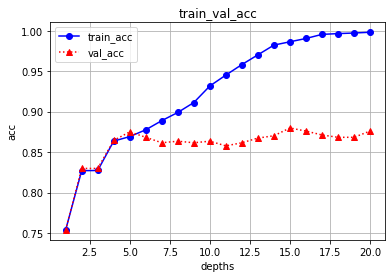

In [ ]:
# 훈련-검증 셋 정확도 시각화
plt.plot(depths, train_acc, 'bo-',label='train_acc')
plt.plot(depths, val_acc, 'r^:', label='val_acc')
plt.grid()
plt.legend()
plt.title('train_val_acc')
plt.xlabel('depths')
plt.ylabel('acc')
plt.show()

위 결과를 보면 tree의 max_depth를 5보다 더 크게 하는 것은 검증셋의 정확도를 높이지 못하고(일반화 성능이 좋아지지는 않고), 과대적합(overfitting)만 더 커지는 결과임.
max_depth의 가장 적절한 값은 5, max_depth를 5로 설정하고 훈련 시킨 모델에서 일반화 성능이 어떨지 예측하는 것은 테스트 셋으로 예측하면 됨.

In [ ]:
# 적절한 하이퍼파라미터가 선택된(튜닝된) 모델을 다시 훈련.
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_tr, y_tr)
print('train score:', tree_clf.score(X_tr,y_tr))
print('test score:', tree_clf.score(X_te,y_te)) # 일반화 성능 측정

train score: 0.8691363964397402
test score: 0.8369230769230769


# 교차 검증(Cross Validation)

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict

In [ ]:
X_tr_full.shape, y_tr_full.shape

((5197, 3), (5197,))

* 교차검증에서는 검증데이터를 따로 만들필요가 없이, 알아서 해주는 함수 = cross_validate

In [ ]:
# 교차 검증에서 사용할 예측기(classifier, regressor)
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
# 5-fold 교차 검증
cv = cross_validate(estimator=clf, X=X_tr_full, y=y_tr_full, n_jobs=-1,
                    return_train_score=True)
cv #> dict

# cross_validate 함수의 파라미터
# cv: 교차 검증의 fold 개수. 기본값은 5.
# n_jobs: 사용하는 CPU 코어의 개수(쓰레드 개수). 기본값은 1. -1은 사용가능한 모든 CPU 코어를 사용하겠다는 의미.
# return_train_score: 훈련 셋의 점수(정확도 또는 R^2 score)를 계산할 지를 결정. 기본값 False.

{'fit_time': array([0.01395178, 0.0070684 , 0.0138979 , 0.00789642, 0.01362562]),
 'score_time': array([0.00128078, 0.00098825, 0.00118685, 0.00814605, 0.00094938]),
 'test_score': array([0.88173077, 0.86538462, 0.84600577, 0.86910491, 0.85370549]),
 'train_score': array([0.86817416, 0.8708203 , 0.87662338, 0.87638288, 0.87469937])}

In [ ]:
# 교차검증에서 검증 점수(정확도)
cv['test_score']

array([0.88173077, 0.86538462, 0.84600577, 0.86910491, 0.85370549])

In [ ]:
np.mean(cv['test_score'])

0.8631863108018065

In [ ]:
# 검증 셋의 점수들의 평균
np.mean(cv['train_score']) # 위코드랑 비교했을 때 약간의 과대적합

0.8733400189738896

교차 검증에서 test_score의 평균으로 테스트 셋의 점수(일반화 성능)를 예상할 수 있음.

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_tr_full, y_tr_full)
tree_clf.score(X_te, y_te)
#> 교차 검증 점수의 평균은 일반적으로 테스트 셋의 점수와 비슷하거나 약간 좋음.
#> 하이퍼파라미터 튜닝을 할 때 교차 검증 점수를 사용할 수 있음.

0.8576923076923076

In [ ]:
# 교차 검증 점수만 필요할 때
cross_val_score(estimator=DecisionTreeClassifier(max_depth=5),
                X=X_tr_full, y=y_tr_full,
                cv=5)

array([0.88173077, 0.86538462, 0.84600577, 0.86910491, 0.85370549])

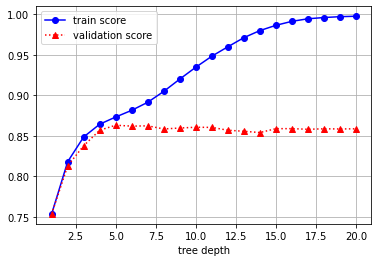

In [ ]:
# 훈련 셋(X_tr_full, y_tr_full), 테스트 셋(X_te, y_te)
train_scores = []
validation_scores = []

max_depths = np.arange(1, 21)
for d in max_depths:
    tree = DecisionTreeClassifier(max_depth=d, random_state=42)
    cv = cross_validate(estimator=tree, X=X_tr_full, y=y_tr_full,
                        n_jobs=-1, return_train_score=True)
    train_scores.append(np.mean(cv['train_score']))
    validation_scores.append(np.mean(cv['test_score']))

plt.plot(max_depths, train_scores, 'bo-', label='train score')
plt.plot(max_depths, validation_scores, 'r^:', label='validation score')
plt.legend()
plt.grid()
plt.xlabel('tree depth')
plt.show()

교차 검증을 통해서 검증 셋 점수가 가장 좋은 max_depth의 값은 5. 최적의 모델(best model)은 max_depth=5인 Decision Tree.

In [ ]:
best_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
best_tree.fit(X_tr_full, y_tr_full)
print('train score:', best_tree.score(X_tr_full, y_tr_full))
print('test score:', best_tree.score(X_te, y_te))

train score: 0.8718491437367712
test score: 0.8576923076923076


# GridSearchCV를 사용한 하이퍼 파라미터 튜닝

In [ ]:
#훈련 셋, 테스트 셋
X_tr_full.shape, y_tr_full.shape, X_te.shape, y_te.shape

((5197, 3), (5197,), (1300, 3), (1300,))

In [ ]:
# 하이퍼 파라미터를 튜닝할 머신러닝모델
tree = DecisionTreeClassifier(random_state=42)

In [ ]:
# 튜닝할 하이퍼파라미터 조합을 dict로 만듦.
# 트리의 max_depth를 1 ~ 20까지 변화.
# 트리에서 노드가 나누어지기 위해서 가져야 할 최소 샘플 개수 - 전체 샘플에서의 비율.
# 튜닝할 하이퍼 파라미터 조합을 만듦.
params = {'max_depth':np.arange(1,21),
          'min_samples_split':[0.01,0.05,0.1,0.15,0.20]}

In [ ]:
# GridSerchCV를 수행하는 객체 생성.
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(estimator=tree, param_grid=params, n_jobs=-1)

In [ ]:
# GridSearchCV를 훈련 셋으로 학습시킴. 
grid_cv.fit(X_tr_full,y_tr_full)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'min_samples_split': [0.01, 0.05, 0.1, 0.15, 0.2]})

In [ ]:
# Grid Search를 통해서 찾은 가장 테스트 점수가 높은 파라미터 조합
grid_cv.best_params_

{'max_depth': 11, 'min_samples_split': 0.01}

In [ ]:
# Grid Search를 통해서 찾은 가장 좋은 테스트 점수
grid_cv.best_score_

0.8666522914044569

In [ ]:
# Grid Search를 통해서 찾은 가장 테스트 점수가 높은 머신러닝 모델
best_tree = grid_cv.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=11, min_samples_split=0.01, random_state=42)

In [ ]:
best_tree.score(X_te,y_te)

0.8538461538461538

In [ ]:
# min_samples_split의 값을 0.01 주변으로 다시 설정해서 grid search
params = {'max_depth':np.arange(1,21),
          'min_samples_split': np.arange(0.005,0.015,0.001)}
grid_cv = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                       param_grid=params, n_jobs=-1)
grid_cv.fit(X_tr_full,y_tr_full)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'min_samples_split': array([0.005, 0.006, 0.007, 0.008, 0.009, 0.01 , 0.011, 0.012, 0.013,
       0.014])})

In [ ]:
grid_cv.best_params_

{'max_depth': 10, 'min_samples_split': 0.009000000000000001}

In [ ]:
grid_cv.best_score_

0.8670365366106463

In [ ]:
best_tree = grid_cv.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=10, min_samples_split=0.009000000000000001,
                       random_state=42)

In [ ]:
# 하이퍼파라미터 튜닝이 모두 끝난 최종적으로 선택된 최적의 모델의 일반화 성능
best_tree.score(X_te,y_te)

0.8584615384615385

# RandomizedSearchCV를 사용한 하이퍼 파라미터 튜닝

* Grid Search: 파라미터들의 조합을 직접 만들어서 cv을 수행.
* Randomized Search:
    * 파라미터들의 조합을 난수로 샘플링할 수 있는 확률 분포 객체를 전달.
    * 파라미터들을 확률분포를 따르는 난수로 생성해서 cv(교차검증)을 수행

In [ ]:
import scipy  # 난수 생성기를 사용하기 위해서.

In [ ]:
int_gen = scipy.stats.randint(0,10) # int -randint
int_gen # [0,10) 정수를 균등 분포로 만들어내는 난수 생성기

In [ ]:
a= int_gen.rvs(100)
# rvs: 무작위 변수
a

array([2, 5, 8, 4, 6, 5, 9, 1, 0, 8, 6, 7, 4, 4, 6, 2, 6, 9, 6, 5, 9, 3,
       8, 4, 0, 5, 6, 2, 9, 4, 1, 9, 1, 8, 1, 0, 4, 6, 7, 9, 7, 6, 1, 7,
       8, 7, 6, 6, 7, 3, 8, 1, 2, 9, 4, 6, 1, 5, 4, 9, 8, 2, 4, 4, 9, 0,
       6, 3, 6, 7, 0, 3, 4, 2, 6, 8, 6, 9, 9, 6, 9, 3, 1, 2, 3, 3, 7, 8,
       3, 9, 5, 0, 9, 7, 1, 1, 5, 4, 9, 2])

In [ ]:
np.unique(a, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 6, 10,  8,  8, 12,  7, 16,  9,  9, 15]))

In [ ]:
uniform_gen = scipy.stats.uniform(0,1) #float = uniform
uniform_gen # [0,1) 미만의 실수들을 균등 분포에서 만드는 난수 생성기

In [ ]:
uniform_gen.rvs(10)

array([0.02940388, 0.19348686, 0.22624896, 0.44974537, 0.31899351,
       0.24471109, 0.60832014, 0.40696796, 0.23855014, 0.72431935])

In [ ]:
# Randomized Search에서 사용할 파라미터 조합.
params = {
    'max_depth': scipy.stats.randint(1,100),
    'min_samples_split': scipy.stats.randint(2, 500),
    'min_samples_leaf': scipy.stats.uniform(0,0.01),
    'min_impurity_decrease':scipy.stats.uniform(0.0001,0.001)
}
# min_samples_leaf = 제일 마지막의 leaf node가 갖는 최소개수
# min_impurity_decrease = 불순도의 차이가 커지는 순서로 나누는데, 그 차이를 줄여주겠다. 기본값은 0

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rand_cv = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                             param_distributions=params,#파라미터의 확률분포
                             n_iter=100, #파라미터 조합의 개수
                             n_jobs=-1)

In [ ]:
rand_cv.fit(X_tr_full, y_tr_full)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb81ea512d0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb819a3dc50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb81e7c3a50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb81e5df610>})

In [ ]:
rand_cv.best_score_

0.8703057673798771

In [ ]:
rand_cv.best_params_

{'max_depth': 36,
 'min_impurity_decrease': 0.00024601846070549207,
 'min_samples_leaf': 0.002150635148475325,
 'min_samples_split': 32}

In [ ]:
best_tree = rand_cv.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=36,
                       min_impurity_decrease=0.00024601846070549207,
                       min_samples_leaf=0.002150635148475325,
                       min_samples_split=32, random_state=42)

In [ ]:
# 일반화 성능
best_tree.score(X_te,y_te)


0.8584615384615385

* fit하고 생겨난 변수에는 변수에 _가 붙는다

## DecisionTreeRegressor

###데이터셋 준비

In [ ]:
# fish 데이터 셋
fish_csv = 'https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'

In [ ]:
fish= pd.read_csv(fish_csv)
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
perch = fish[fish.Species =='Perch']
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [ ]:
X = perch.iloc[:,2:].values.copy()
y = perch['Weight'].values.copy()

In [ ]:
X_tr,X_te,y_tr,y_te=train_test_split(X,y,
                                     random_state=42,
                                     test_size=0.25)

In [ ]:
X_tr[:5]

array([[19.6   , 20.8   ,  5.1376,  3.0368],
       [22.    , 23.5   ,  5.875 ,  3.525 ],
       [18.7   , 19.4   ,  5.1992,  3.1234],
       [17.4   , 18.5   ,  4.588 ,  2.9415],
       [36.    , 38.3   , 10.6091,  6.7408]])

In [ ]:
y_tr[:5]

array([ 85., 135.,  78.,  70., 700.])

### 모델 훈련

In [ ]:
tree_reg = DecisionTreeRegressor()

In [ ]:
tree_reg.fit(X_tr,y_tr)

DecisionTreeRegressor()

In [ ]:
plt.figure(figsize=(20,16))
plot_tree(tree_reg,max_depth=2,
          feature_names=perch.columns[2:],
          filled=True)
plt.show()

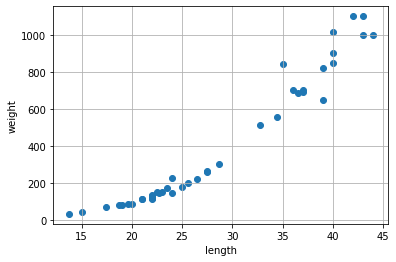

In [ ]:
# 훈련 셋의 농어 길이 ~ 무게
plt.scatter(X_tr[:,0], y_tr)
plt.grid()
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 훈련 셋 예측값, MSE
tr_pred = tree_reg.predict(X_tr)
tr_pred[:3]

array([ 85., 135.,  78.])

In [ ]:
r2_score(y_tr,tr_pred)

1.0

In [ ]:
# 테스트 셋 예측값, MSE
te_pred = tree_reg.predict(X_te)
te_pred[:3]

array([ 32.,  78., 260.])

In [ ]:
r2_score(y_te,te_pred)

0.9661949133090981

## cross_validate 함수 이용, max_depth=[1,7]변경, 훈련셋/테스트 셋 점수 시각화

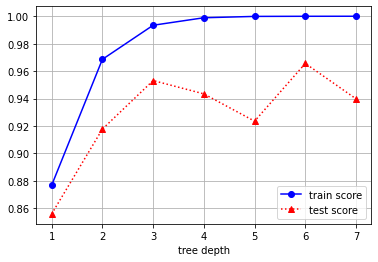

In [ ]:
train_scores=[]
test_scores=[]

depths=np.arange(1,8)

for d in depths:
    tree_reg2 = DecisionTreeRegressor(max_depth=d,random_state=42) #CV 머신러닝 모델 생성
    cv = cross_validate(estimator=tree_reg2, X=X_tr, y=y_tr, n_jobs=-1,
                    return_train_score=True) # 5-fold cv
    train_scores.append(np.mean(cv['train_score']))
    test_scores.append(np.mean(cv['test_score']))

plt.plot(depths, train_scores, 'bo-', label='train score')
plt.plot(depths, test_scores, 'r^:', label='test score')
plt.legend()
plt.grid()
plt.xlabel('tree depth')
plt.show()

##GridSearchCV를 사용

In [ ]:
param_grid={'max_depth':np.arange(1,10)}
grid_reg = GridSearchCV(estimator=tree_reg2, param_grid=param_grid, n_jobs=-1)
grid_reg.fit(X_tr,y_tr)

GridSearchCV(estimator=DecisionTreeRegressor(max_depth=7, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [ ]:
grid_reg.best_score_ #test에서의 점수

0.9655899177591556

In [ ]:
grid_reg.best_params_

{'max_depth': 6}

In [ ]:
# 일반화 성능 예측
best_tree = grid_reg.best_estimator_
best_tree.score(X_te,y_te)

0.9235971820436095

### Pipeline과 GridSearchCV

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.pipeline import Pipeline

In [ ]:
# 교차 검증을 할 머신 러닝 모델
model = Pipeline(
    [('poly', PolynomialFeatures(include_bias=False)),
                  ('scaler', StandardScaler()),
                   ('reg', LinearRegression())])

In [ ]:
# 교차 검증에서 튜닝할 파라미터 조합
param = {'poly__degree': np.arange(1,6)}

#Grid Search 객체 생성
grid = GridSearchCV(estimator=model,param_grid=param, n_jobs=-1)

In [ ]:
grid.fit(X_tr,y_tr)

GridSearchCV(estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('reg', LinearRegression())]),
             n_jobs=-1, param_grid={'poly__degree': array([1, 2, 3, 4, 5])})

In [ ]:
grid.best_score_

0.9313419567902571

In [ ]:
grid.best_params_

{'poly__degree': 2}

In [ ]:
model2 = Pipeline([('poly', PolynomialFeatures(include_bias=False)),
                   ('scaler', StandardScaler()),
                   ('reg', ElasticNet())])

In [ ]:
params = {'poly__degree': np.arange(1,10),
          'reg__alpha': [0.1,0.5,1.0,10],
          'reg__l1_ratio': np.arange(0,1,0.2)}

# 변수 사이 언더바가 1개 들어가있는 변수들이 있기에, 다른 변수와 구별을 위해
# __를 두개 사용.

In [ ]:
grid_cv = GridSearchCV(estimator=model2, param_grid=params)

In [ ]:
grid_cv.fit(X_tr,y_tr)

In [ ]:
grid_cv.best_score_

0.9845937514272582

In [ ]:
grid_cv.best_params_

{'poly__degree': 4, 'reg__alpha': 1.0, 'reg__l1_ratio': 0.0}

In [ ]:
best_model = grid_cv.best_estimator_
best_model

Pipeline(steps=[('poly', PolynomialFeatures(degree=4, include_bias=False)),
                ('scaler', StandardScaler()),
                ('reg', ElasticNet(l1_ratio=0.0))])

In [ ]:
best_model.score(X_te,y_te) #일반화 성능

0.9766366793642618